In [1]:
import numpy as np
import pandas as pd
import pickle

## Data

In [2]:
# Train Data
with open("G:/NLP_Project/UPDATED_NLP_COURSE/06-Deep-Learning/train_qa.txt","rb") as f:
    train_set = pickle.load(f)

In [3]:
#Test Data
with open("G:/NLP_Project/UPDATED_NLP_COURSE/06-Deep-Learning/test_qa.txt","rb") as f:
    test_set = pickle.load(f)

In [4]:
type(train_set), type(test_set)

(list, list)

In [5]:
len(train_set), len(test_set)

(10000, 1000)

In [6]:
train_set

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [7]:
train_set[0] # Tuples of  

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
' '.join(train_set[0][0])  #Story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
' '.join(train_set[0][1])  #Question(Q)

'Is Sandra in the hallway ?'

In [10]:
train_set[0][2]  # Answer(A)

'no'

### Vocabulary Building 
   * Marging the train data with test data as a whole data
   * This will act as a comparrison dictionary

In [11]:
all_data = train_set + test_set

In [12]:
len(all_data)

11000

In [13]:
vocab = set() # Will contain the distict words

for story, question, answer in all_data:
        vocab = vocab.union(set(story))
        vocab = vocab.union(set(question))
        
vocab.add('yes')
vocab.add('no')

In [14]:
vocab # Contains unique words

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [15]:
 vocab_len = len(vocab) + 1 # 1 is for place holder for added 0

In [16]:
vocab_len

38

### Longest Story

In [17]:
all_story_len = [len(data[0]) for data in all_data]

In [18]:
all_story_len

[12,
 26,
 39,
 52,
 64,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 38,
 50,
 63,
 13,
 25,
 37,
 49,
 61,
 24,
 37,
 48,
 71,
 83,
 13,
 25,
 37,
 50,
 62,
 12,
 24,
 35,
 46,
 71,
 12,
 24,
 37,
 50,
 62,
 13,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 39,
 50,
 62,
 13,
 26,
 38,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 62,
 13,
 25,
 38,
 52,
 65,
 12,
 24,
 37,
 48,
 61,
 13,
 25,
 38,
 51,
 64,
 12,
 25,
 39,
 53,
 65,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 25,
 37,
 49,
 60,
 72,
 13,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 12,
 23,
 36,
 47,
 59,
 12,
 24,
 35,
 48,
 61,
 12,
 23,
 36,
 49,
 62,
 12,
 25,
 37,
 48,
 59,
 12,
 25,
 37,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 61,
 12,
 24,
 35,
 48,
 61,
 12,
 25,
 37,
 49,
 62,
 12,
 24,
 38,
 50,
 62,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 60,


In [19]:
max_story_len = max(all_story_len)
max_story_len

156

### Longest Question

In [20]:
max_Q_len = max([len(data[1]) for data in all_data])
max_Q_len

6

## Data Preprocessing
  * Text to Sequence
  * Vectorizing the text

In [21]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer(filters=[])  # Enpty Iterable
tokenizer.fit_on_texts(vocab)

In [23]:
tokenizer.word_index # Mapping words to numbers

{'there': 1,
 'back': 2,
 'picked': 3,
 'in': 4,
 'down': 5,
 'the': 6,
 'hallway': 7,
 'bathroom': 8,
 'bedroom': 9,
 '.': 10,
 'sandra': 11,
 'office': 12,
 'to': 13,
 'put': 14,
 '?': 15,
 'up': 16,
 'moved': 17,
 'daniel': 18,
 'kitchen': 19,
 'grabbed': 20,
 'mary': 21,
 'john': 22,
 'milk': 23,
 'journeyed': 24,
 'dropped': 25,
 'garden': 26,
 'discarded': 27,
 'apple': 28,
 'got': 29,
 'took': 30,
 'is': 31,
 'left': 32,
 'travelled': 33,
 'yes': 34,
 'no': 35,
 'football': 36,
 'went': 37}

In [24]:
# Lets separate the stories, questions and answers
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_set:
    train_story_text.append(story)        # Only stories
    train_question_text.append(question)  # Only questions
    train_answers.append(answer)          # Only answers

In [25]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [26]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [27]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [28]:
train_story_seq

[[21, 17, 13, 6, 8, 10, 11, 24, 13, 6, 9, 10],
 [21,
  17,
  13,
  6,
  8,
  10,
  11,
  24,
  13,
  6,
  9,
  10,
  21,
  37,
  2,
  13,
  6,
  9,
  10,
  18,
  37,
  2,
  13,
  6,
  7,
  10],
 [21,
  17,
  13,
  6,
  8,
  10,
  11,
  24,
  13,
  6,
  9,
  10,
  21,
  37,
  2,
  13,
  6,
  9,
  10,
  18,
  37,
  2,
  13,
  6,
  7,
  10,
  11,
  37,
  13,
  6,
  19,
  10,
  18,
  37,
  2,
  13,
  6,
  8,
  10],
 [21,
  17,
  13,
  6,
  8,
  10,
  11,
  24,
  13,
  6,
  9,
  10,
  21,
  37,
  2,
  13,
  6,
  9,
  10,
  18,
  37,
  2,
  13,
  6,
  7,
  10,
  11,
  37,
  13,
  6,
  19,
  10,
  18,
  37,
  2,
  13,
  6,
  8,
  10,
  18,
  3,
  16,
  6,
  36,
  1,
  10,
  18,
  37,
  13,
  6,
  9,
  10],
 [21,
  17,
  13,
  6,
  8,
  10,
  11,
  24,
  13,
  6,
  9,
  10,
  21,
  37,
  2,
  13,
  6,
  9,
  10,
  18,
  37,
  2,
  13,
  6,
  7,
  10,
  11,
  37,
  13,
  6,
  19,
  10,
  18,
  37,
  2,
  13,
  6,
  8,
  10,
  18,
  3,
  16,
  6,
  36,
  1,
  10,
  18,
  37,
  13,
  6,
  9,
  10

In [29]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_Q_len):
        '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    # STORIES(X)
    X = []
    # Questions(Xq)
    Xq = []
    # Answers(Y = 'yes'/'no')
    Y = []
    
    for story, query, answer in data:
        # for each story [23,15,...]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        
        y  =  np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_Q_len),np.array(Y)) 

In [30]:
input_train, queries_train, answers_train = vectorize_stories(train_set)

In [31]:
input_test, queries_test, answers_test = vectorize_stories(test_set)

In [32]:
input_test

array([[ 0,  0,  0, ...,  6,  9, 10],
       [ 0,  0,  0, ...,  6, 26, 10],
       [ 0,  0,  0, ...,  6, 26, 10],
       ...,
       [ 0,  0,  0, ...,  6, 28, 10],
       [ 0,  0,  0, ...,  6, 26, 10],
       [ 0,  0,  0, ..., 28,  1, 10]])

In [33]:
answers_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
tokenizer.word_index['yes']

34

In [35]:
tokenizer.word_index['no']

35

In [36]:
sum(answers_test)  # On 18th index, there are 497 number of 'yes' and on 31st there are 503 # of 'no'

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497., 503.,   0.,   0.])

## Build the Neural Network Model
 According to the paper **Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks"**,  http://arxiv.org/abs/1503.0889lets build the following
 * Input Encoder (M)
 * Input Encoder (C)
 * Question Encoder

In [37]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

We have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [38]:
input_sequence = Input((max_story_len,))
question = Input((max_Q_len,))

In [39]:
vocab_size = len(vocab) + 1

## Encoders
To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

#### Input Encoder m

In [40]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))  # Dropout 0.3 means 30% of nerual netework will be off randomly

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

#### Input Encoder c


In [41]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_Q_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

#### Question Encoder

In [42]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_Q_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [43]:
# ENCODED <------ ENCODER(Input)
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [44]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [45]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [46]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])
answer

<tf.Tensor 'concatenate/concat:0' shape=(None, 6, 220) dtype=float32>

### LSTM - Network

In [47]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [49]:
# train
history = model.fit([input_train, queries_train], answers_train,batch_size=32,epochs=150,validation_data=([input_test, queries_test], answers_test))

Epoch 1/150
313/313 [==============================] - 14s 43ms/step - loss: 0.9529 - accuracy: 0.4893 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 2/150
313/313 [==============================] - 12s 38ms/step - loss: 0.7076 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 3/150
313/313 [==============================] - 13s 41ms/step - loss: 0.6972 - accuracy: 0.5026 - val_loss: 0.6958 - val_accuracy: 0.5030
Epoch 4/150
313/313 [==============================] - 12s 38ms/step - loss: 0.6954 - accuracy: 0.4974 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 5/150
313/313 [==============================] - 14s 44ms/step - loss: 0.6948 - accuracy: 0.4988 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/150
313/313 [==============================] - 11s 37ms/step - loss: 0.6947 - accuracy: 0.4946 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 7/150
313/313 [==============================] - 10s 33ms/step - loss: 0.6942 - accuracy: 0.5013 - val_loss: 0.6935 - val_ac

313/313 [==============================] - 9s 30ms/step - loss: 0.2737 - accuracy: 0.8774 - val_loss: 0.3521 - val_accuracy: 0.8280
Epoch 57/150
313/313 [==============================] - 10s 31ms/step - loss: 0.2758 - accuracy: 0.8799 - val_loss: 0.3552 - val_accuracy: 0.8280
Epoch 58/150
313/313 [==============================] - 10s 32ms/step - loss: 0.2735 - accuracy: 0.8792 - val_loss: 0.3535 - val_accuracy: 0.8270
Epoch 59/150
313/313 [==============================] - 10s 31ms/step - loss: 0.2709 - accuracy: 0.8808 - val_loss: 0.3617 - val_accuracy: 0.8330
Epoch 60/150
313/313 [==============================] - 9s 30ms/step - loss: 0.2712 - accuracy: 0.8780 - val_loss: 0.3514 - val_accuracy: 0.8270
Epoch 61/150
313/313 [==============================] - 10s 32ms/step - loss: 0.2708 - accuracy: 0.8783 - val_loss: 0.3661 - val_accuracy: 0.8280
Epoch 62/150
313/313 [==============================] - 10s 32ms/step - loss: 0.2720 - accuracy: 0.8799 - val_loss: 0.3543 - val_accuracy: 

313/313 [==============================] - 9s 29ms/step - loss: 0.2021 - accuracy: 0.9147 - val_loss: 0.4901 - val_accuracy: 0.8320
Epoch 113/150
313/313 [==============================] - 9s 29ms/step - loss: 0.1976 - accuracy: 0.9158 - val_loss: 0.4626 - val_accuracy: 0.8310
Epoch 114/150
313/313 [==============================] - 9s 30ms/step - loss: 0.2027 - accuracy: 0.9141 - val_loss: 0.4762 - val_accuracy: 0.8290
Epoch 115/150
313/313 [==============================] - 13s 41ms/step - loss: 0.1998 - accuracy: 0.9135 - val_loss: 0.4843 - val_accuracy: 0.8190
Epoch 116/150
313/313 [==============================] - 9s 30ms/step - loss: 0.1965 - accuracy: 0.9142 - val_loss: 0.5178 - val_accuracy: 0.8220
Epoch 117/150
313/313 [==============================] - 9s 30ms/step - loss: 0.2006 - accuracy: 0.9158 - val_loss: 0.5032 - val_accuracy: 0.8290
Epoch 118/150
313/313 [==============================] - 10s 30ms/step - loss: 0.1993 - accuracy: 0.9150 - val_loss: 0.5586 - val_accurac

In [50]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


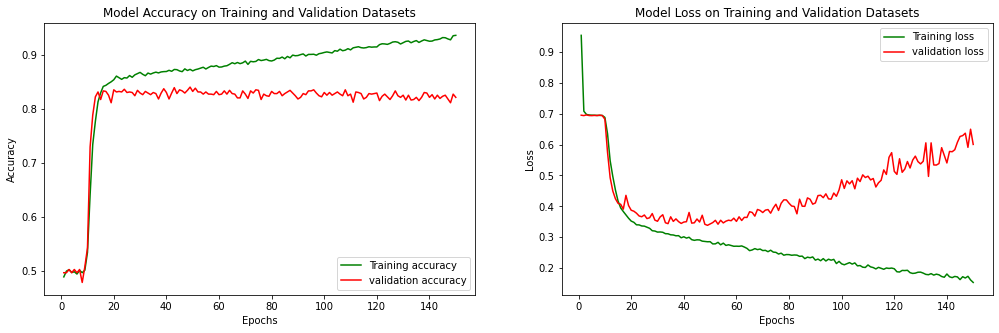

In [53]:
import matplotlib.pyplot as plt

accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,151)

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [17, 5]  # width, height

plt.subplot(1, 2, 1)
#fig.suptitle('Horizontally stacked subplots')

plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'r', label='validation accuracy')
plt.title('Model Accuracy on Training and Validation Datasets')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'validation accuracy'], loc='lower right')
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')
plt.title('Model Loss on Training and Validation Datasets')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'validation loss'], loc='upper right')


plt.show()

**Runtime: 26 minitues** 

### Save the model

In [54]:
model.save('My_Q&A_Assistant_Model.h5')

### Load the model

In [55]:
model.load_weights('My_Q&A_Assistant_Model.h5')  #150 Epochs model

In [56]:
pred_results = model.predict(([input_test, queries_test]))

In [57]:
test_set[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [58]:
story =' '.join(word for word in test_set[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [61]:
query =' '.join(word for word in test_set[0][1])
print(query)

Is John in the kitchen ?


In [63]:
print("True Test Answer from Data is:",test_set[0][2])

True Test Answer from Data is: no


In [64]:
pred_results  # probabilities for every sngle word

array([[6.09073434e-18, 5.49425605e-18, 4.29138696e-18, ...,
        9.99999881e-01, 7.60674878e-18, 5.37710494e-18],
       [4.17598410e-18, 3.94274770e-18, 3.28995620e-18, ...,
        9.99999762e-01, 4.91128521e-18, 4.04812017e-18],
       [1.00771676e-10, 1.00397572e-10, 1.13549004e-10, ...,
        1.15873978e-01, 1.03338060e-10, 9.15138659e-11],
       ...,
       [5.32954950e-17, 5.08103169e-17, 4.76901949e-17, ...,
        9.99992728e-01, 4.91475813e-17, 5.14151348e-17],
       [7.78082083e-17, 6.85341372e-17, 8.11175793e-17, ...,
        1.59746720e-04, 7.48736825e-17, 7.35140623e-17],
       [1.98812687e-13, 2.09155813e-13, 2.47823138e-13, ...,
        4.28918660e-01, 1.97206062e-13, 2.11498611e-13]], dtype=float32)

In [65]:
pred_results.shape # 37 vocab words + 1 extra padding and 1000 test stories, question with answers

(1000, 38)

In [66]:
pred_results[0]

array([6.0907343e-18, 5.4942561e-18, 4.2913870e-18, 4.7228857e-18,
       5.0486261e-18, 4.7117105e-18, 6.3212931e-18, 5.6038385e-18,
       6.0789660e-18, 6.0249214e-18, 5.0246669e-18, 4.9671323e-18,
       7.1179388e-18, 4.7552268e-18, 4.9870864e-18, 5.4594073e-18,
       4.8068404e-18, 6.6326998e-18, 4.9928733e-18, 4.5725862e-18,
       7.8752938e-18, 5.3420821e-18, 5.9310612e-18, 4.5457508e-18,
       5.6944751e-18, 4.8871026e-18, 4.5031204e-18, 4.6412112e-18,
       5.3200986e-18, 4.8315483e-18, 5.4758848e-18, 3.9911568e-18,
       5.1428619e-18, 5.1585415e-18, 1.2484979e-07, 9.9999988e-01,
       7.6067488e-18, 5.3771049e-18], dtype=float32)

In [67]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])   # finds max probabiltiy 

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999999


## Writing User's Own Stories and Questions

Remember you can only use words from the existing vocab

In [73]:
# EXISTING VOCAB to be used 
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [68]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [70]:
my_question = "Is the football in the garden ?"
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [71]:
mydata = [(my_story.split(),my_question.split(),'yes')]

my_story,my_ques,my_ans = vectorize_stories(mydata)  # VECTORIZE function call

pred_results = model.predict(([my_story, my_ques]))
pred_results

array([[4.3932812e-16, 3.6279308e-16, 4.7550736e-16, 3.4585353e-16,
        4.8823053e-16, 4.4356159e-16, 4.2470989e-16, 3.4502466e-16,
        4.5335856e-16, 4.2166528e-16, 3.8676178e-16, 3.8789651e-16,
        4.0122773e-16, 3.8349295e-16, 3.9485812e-16, 4.2053119e-16,
        3.7626493e-16, 4.0289951e-16, 3.9478734e-16, 3.8618974e-16,
        4.2240263e-16, 4.3397630e-16, 4.4940349e-16, 4.1365942e-16,
        3.5088342e-16, 4.0939106e-16, 4.3737166e-16, 4.2882541e-16,
        3.7655498e-16, 3.3669808e-16, 4.5573581e-16, 3.9529519e-16,
        4.1376990e-16, 3.5777668e-16, 9.9928790e-01, 7.1210926e-04,
        3.7408953e-16, 4.3328650e-16]], dtype=float32)

In [72]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9992879
